In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

random_state = 42

In [2]:
df = pd.read_excel("Walmart_clusters.xlsx")
class_0 = df[df["cluster_sklearn"] == 0]
class_0["Date"] = pd.to_datetime(class_0["Date"])
class_0.set_index("Date", inplace=True)


In [3]:
class_0["Date"] = pd.to_datetime(class_0["Date"])
class_0.set_index("Date", inplace=True)

C:\Users\hubert.stadnicki\AppData\Local\Temp\ipykernel_4288\4271373877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0["Date"] = pd.to_datetime(class_0["Date"])


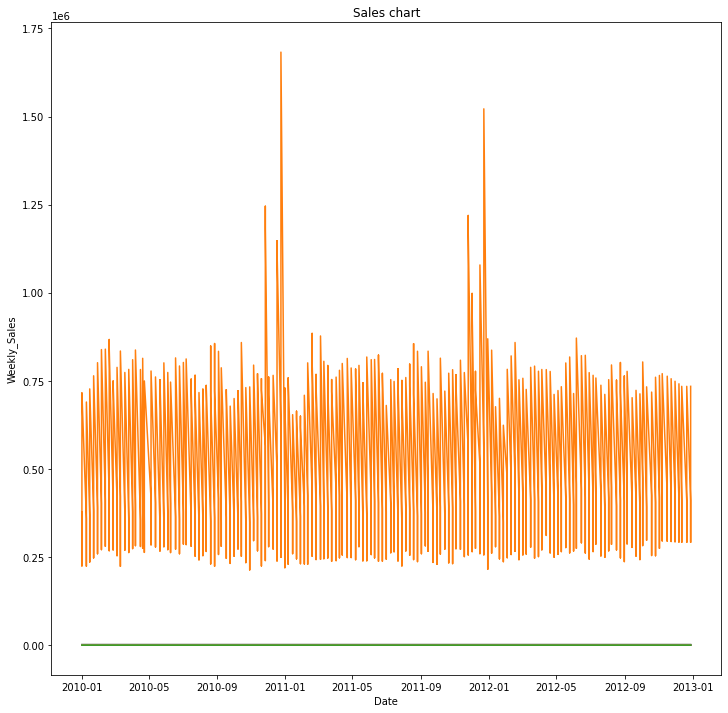

In [4]:
plt.figure(figsize=(12,12))
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")
plt.title("Sales chart")
plt.plot(class_0)
plt.show()
pass

In [5]:
temp = class_0["Weekly_Sales"]

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = np.array(df)
    X = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
    return np.array(X)

In [7]:
X = df_to_X_y(temp, 4)
y = np.array(temp)
X.shape, y.shape

((2817, 4, 1), (2821,))

In [8]:
X_train, y_train = X[:2000], y[:2000]
X_test, y_test = X[2000:], y[2000:]

X_train.shape, y_train.shape, X_test.shape, y_train.shape

((2000, 4, 1), (2000,), (817, 4, 1), (2000,))

In [9]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((4,1)))
model1.add(LSTM(64))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, "linear"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [11]:
# cp = ModelCheckpoint("model1/", save_best_only=True)
model1.compile(optimizer=Adam(), loss="mse")
# model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [17]:
model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 0s 5ms/step - loss: 258911420416.0000
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 258734309376.0000
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 258556608512.0000
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 258377891840.0000
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 258198224896.0000
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 258017198080.0000
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 257835417600.0000
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 257652785152.0000
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 257469071360.0000
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 257284816896.0000


In [19]:
train_predictions = model1.predict(X_test)
train_results = pd.DataFrame(data={"Train Predictions": train_predictions, "Actuals": y_train})
train_results

26/26 [==============================] - 0s 2ms/step


ValueError: Per-column arrays must each be 1-dimensional

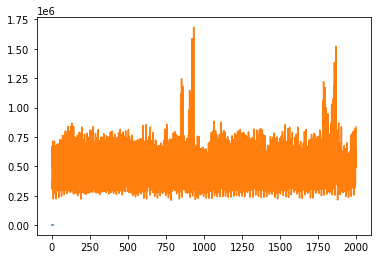

In [194]:
plt.plot(train_results["Train Predictions"][:10])
plt.plot(train_results["Actuals"])
pass

In [195]:
X_test.shape, y_test[:816].shape

((816, 5, 1), (816,))

In [196]:
y_test = y_test[:816]

In [197]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={"Train Predictions": test_predictions, "Actuals": y_test})
test_results

26/26 [==============================] - 0s 6ms/step


,Train Predictions,Actuals
0,3667.600098,654088
1,3667.600098,559607
2,3667.600098,435109
3,3667.600098,266301
4,3667.600098,326317
...,...,...
811,3667.600098,513737
812,3667.600098,434593
813,3667.600098,291781
814,3667.600098,300237


Model z wieloma zmiennymi (MULTIVARIETE)

In [198]:
class_0.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'yyyy', 'mm', 'dd', 'week_relative',
       'week_absolute', 'cluster_sklearn'],
      dtype='object')

In [199]:
class_0v1 = class_0[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment']]

In [200]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, "relu"))
model2.add(Dense(1, "linear"))

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 8)                 2056      
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [201]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8, "relu"))
model3.add(Dense(1, "linear"))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                12864     
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [202]:
cp2 = ModelCheckpoint("Projekt_DL/", save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [203]:
cp3 = ModelCheckpoint("Projekt_DL/", save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [204]:
class_0v1 = class_0[['Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment']]

In [205]:
temp_df = pd.concat([temp, class_0v1], axis=1)
temp_df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-01-01,377219,0,65.065,3.234,216.539,7.567
2010-01-01,309443,0,61.722,3.234,213.766,6.639
2010-01-01,669225,0,27.723,3.179,191.968,8.873
2010-01-01,494392,0,59.275,3.234,216.770,6.476
2010-01-01,576183,0,37.713,3.600,133.786,7.900
...,...,...,...,...,...,...
2012-12-28,437321,0,71.740,4.468,131.108,10.199
2012-12-28,612380,0,76.030,4.468,131.108,6.943
2012-12-28,619370,0,71.140,3.601,214.677,8.839


In [218]:
def df_to_X_y2(df, window_size=7):
    df_as_np = df.to_numpy()
    X2 = []
    y2 = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X2.append(row)
        label = df_as_np[i+window_size][0]
        y2.append(label)
    return np.array(X2), np.array(y2)

In [219]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((2814, 7, 6), (2814,))

In [220]:
X2_train, y2_train = X2[:2000], y2[:2000]
X2_val, y2_val = X2[2000:2400], y2[2000:2400]
X2_test, y2_test = X2[2400:], y2[2400:]

X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape, X2_val.shape, y2_val.shape

((2000, 7, 6), (2000,), (414, 7, 6), (414,), (400, 7, 6), (400,))

In [221]:
model4 = Sequential()
model4.add(InputLayer((7,6)))
model4.add(LSTM(64))
model4.add(Dense(8, "relu"))
model4.add(Dense(1, "linear"))

model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                18176     
                                                                 
 dense_30 (Dense)            (None, 8)                 520       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,705
Trainable params: 18,705
Non-trainable params: 0
_________________________________________________________________


In [222]:
y2_train

array([642692., 493678., 415493., ..., 326317., 541071., 415514.])

In [223]:
# cp4 = ModelCheckpoint("Projekt_DL/", save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [224]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10)

Epoch 1/10
63/63 [==============================] - 2s 10ms/step - loss: 292222959616.0000 - root_mean_squared_error: 540576.5000 - val_loss: 284251455488.0000 - val_root_mean_squared_error: 533152.3750
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 292189011968.0000 - root_mean_squared_error: 540545.1250 - val_loss: 284195815424.0000 - val_root_mean_squared_error: 533100.1875
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 292111089664.0000 - root_mean_squared_error: 540473.0000 - val_loss: 284094201856.0000 - val_root_mean_squared_error: 533004.8750
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 291986964480.0000 - root_mean_squared_error: 540358.1875 - val_loss: 283946057728.0000 - val_root_mean_squared_error: 532865.8750
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 291816996864.0000 - root_mean_squared_error: 540200.8750 - val_loss: 283753119744.0000 - val_root_mean_squared_error: 5

In [227]:
X2_test

array([[[3.03290e+05, 0.00000e+00, 8.17600e+01, 3.30100e+00,
         2.20615e+02, 6.62300e+00],
        [5.03745e+05, 0.00000e+00, 8.17600e+01, 3.31100e+00,
         2.20615e+02, 6.62300e+00],
        [4.41684e+05, 0.00000e+00, 8.55300e+01, 3.72600e+00,
         1.30701e+02, 1.09260e+01],
        ...,
        [5.96554e+05, 0.00000e+00, 8.38300e+01, 3.31100e+00,
         2.13322e+02, 9.28500e+00],
        [3.37819e+05, 0.00000e+00, 7.56900e+01, 3.55600e+00,
         1.30701e+02, 5.40700e+00],
        [7.37614e+05, 0.00000e+00, 7.88900e+01, 3.56700e+00,
         1.91167e+02, 8.68400e+00]],

       [[5.03745e+05, 0.00000e+00, 8.17600e+01, 3.31100e+00,
         2.20615e+02, 6.62300e+00],
        [4.41684e+05, 0.00000e+00, 8.55300e+01, 3.72600e+00,
         1.30701e+02, 1.09260e+01],
        [5.30318e+05, 0.00000e+00, 8.44500e+01, 3.58900e+00,
         1.30701e+02, 7.17000e+00],
        ...,
        [3.37819e+05, 0.00000e+00, 7.56900e+01, 3.55600e+00,
         1.30701e+02, 5.40700e+00],
  

In [225]:
test_predictions2 = model4.predict(X2_test).flatten()
test_results2 = pd.DataFrame(data={"Train Predictions": test_predictions2, "Actuals": y2_test})
test_results2

13/13 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,2064.903076,389428.0
1,2064.903076,306827.0
2,2064.903076,686365.0
3,2064.903076,495951.0
4,2064.903076,571191.0
...,...,...
409,2064.903076,437321.0
410,2064.903076,612380.0
411,2064.903076,619370.0
412,2064.903076,337796.0


In [21]:
df = pd.read_excel("Walmart_clusters.xlsx")
class_0 = df[df["cluster_sklearn"] == 0]
class_0["Date"] = pd.to_datetime(class_0["Date"])
class_0.set_index("Date", inplace=True)
class_0 = class_0["Weekly_Sales"]

C:\Users\hubert.stadnicki\AppData\Local\Temp\ipykernel_4288\960399868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_0["Date"] = pd.to_datetime(class_0["Date"])


In [23]:
class_0 = class_0.groupby("Date").sum()

In [24]:
class_0.head()

Date
2010-01-01    8696377
2010-01-09    8538939
2010-01-15    8790904
2010-01-22    9042872
2010-01-29    9294833
Name: Weekly_Sales, dtype: int64

In [25]:
class_0.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 157 entries, 2010-01-01 to 2012-12-28
Series name: Weekly_Sales
Non-Null Count  Dtype
--------------  -----
157 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [30]:
class_0 = class_0.to_numpy().reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [31]:
x = class_0

In [34]:
# zamiana danych na sekwencję, wymagają tego warstwy rekurencyjne
# długość sekwencji zależy od tego po jakiej ilości próbek w czasie chcemy aby rekurencja chodziła
def ConvertDataToSequence(data, windowLen, featNum):
    """
    :param data: dane w postaci szeregu, typu numpy.array, shape=(N,Feat)
    :param windowLen: długość okna czyli długość sekwencji
    :param featNum: ilość cech w ramach szeregu
    """
    #długość wejściowego szeregu
    lenOfAllSeq = data.shape[0]
    # pusty kontener na kolejne sekwencje
    xSeq = []
    # idziemy po szeregu i tworzymy z niego sekwencje
    for i in range(lenOfAllSeq-windowLen):
        xSeq.append(data[i:i+windowLen])
    xSeq = np.array(xSeq).reshape(-1,windowLen,featNum)
    
    # definiujemy wartości następujące po każdej sekwencji, będą to nasze wyjścia
    y = data[windowLen:,0].reshape(-1,1)
    
    return xSeq, y

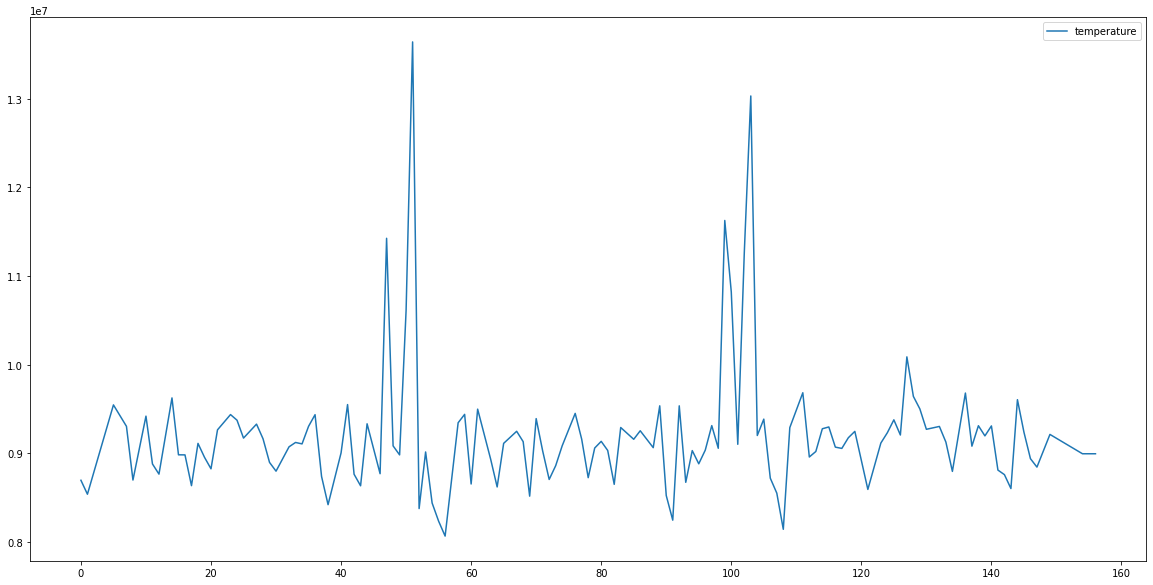

In [32]:
fig = plt.figure(figsize=(20,10))
plt.plot(x)
plt.legend(["temperature", "month"])
plt.show()

In [35]:
seqLen = 4
featNum = 1
xSeq, y = ConvertDataToSequence(x, seqLen, featNum)
print(f"sequence shape: {xSeq.shape}")
print(f"output shape: {y.shape}")

sequence shape: (153, 4, 1)
output shape: (153, 1)


In [48]:
test_percent = 0.2
x_len = xSeq.shape[0]
x_train_num = int(x_len*(1.0-test_percent))
x_test_num = int(x_len*test_percent)
xSeq_train = xSeq[:x_train_num]
xSeq_test = xSeq[-x_test_num:]
y_train = y[:x_train_num]
y_test = y[-x_test_num:]

In [51]:
print(f"sequence shape: {xSeq_train.shape}")
print(f"output shape: {y_test.shape}")

sequence shape: (122, 4, 1)
output shape: (30, 1)


ValueError: x and y must have same first dimension, but have shapes (31,) and (30,)

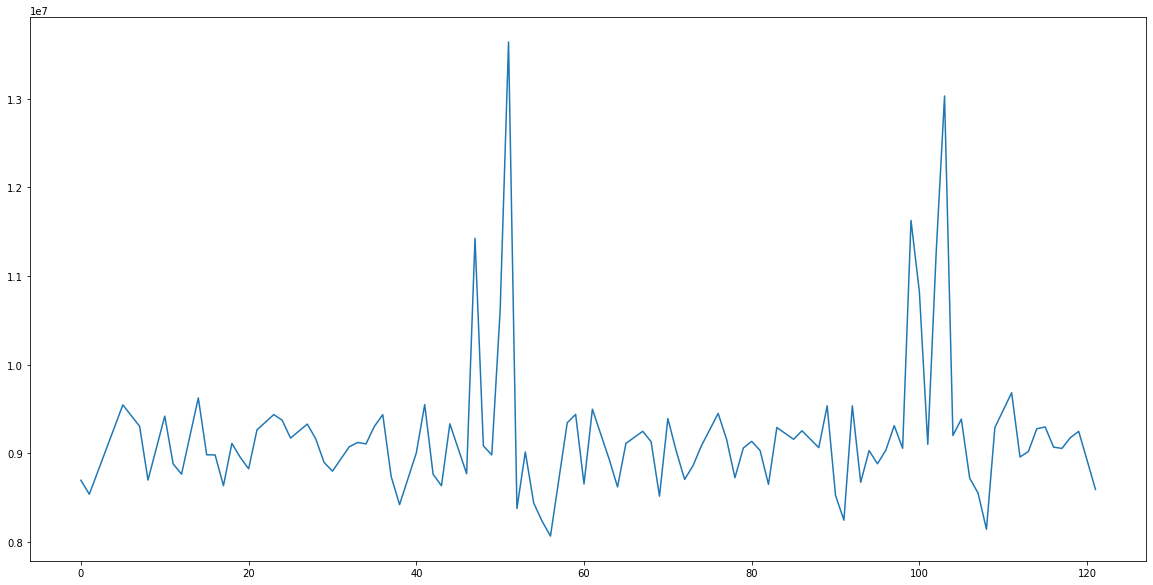

In [37]:
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(x_train_num), xSeq_train[:,0,0])
plt.plot(np.arange(x_train_num, x_len), xSeq_test[:,0,0])
plt.legend(["train","test"])
plt.title("data")
plt.show()

In [42]:
model4 = Sequential()
model4.add(InputLayer((4,1)))
model4.add(LSTM(64))
model4.add(Dense(8, "relu"))
model4.add(Dense(1, "linear"))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [44]:
model4.compile(optimizer=Adam(), loss="mse")

In [46]:
X_train.shape

(2000, 4, 1)

In [52]:
model4.fit(xSeq_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 5s 16ms/step - loss: 85191028637696.0000
Epoch 2/10
4/4 [==============================] - 0s 16ms/step - loss: 85191028637696.0000
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 85191028637696.0000
Epoch 4/10
4/4 [==============================] - 0s 15ms/step - loss: 85191020249088.0000
Epoch 5/10
4/4 [==============================] - 0s 15ms/step - loss: 85191011860480.0000
Epoch 6/10
4/4 [==============================] - 0s 15ms/step - loss: 85191003471872.0000
Epoch 7/10
4/4 [==============================] - 0s 15ms/step - loss: 85191011860480.0000
Epoch 8/10
4/4 [==============================] - 0s 14ms/step - loss: 85191003471872.0000
Epoch 9/10
4/4 [==============================] - 0s 14ms/step - loss: 85191011860480.0000
Epoch 10/10
4/4 [==============================] - 0s 16ms/step - loss: 85191003471872.0000


In [54]:
xSeq_test.shape

(30, 4, 1)

In [56]:
test_predictions2 = model4.predict(xSeq_test[:,:]).flatten()
test_results2 = pd.DataFrame(data={"Train Predictions": test_predictions2, "Actuals": y_test})
test_results2

1/1 [==============================] - 0s 30ms/step


ValueError: Per-column arrays must each be 1-dimensional